### Importing important libraries

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [67]:
url="https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [68]:
data=pd.read_csv(url)
data.columns =['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']


In [69]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
E mbarked      889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Dropping  columns which are not needed to predict the survival status 

In [72]:
data=data.drop(["Name","PassengerId","Ticket","Cabin","E mbarked"],axis=1)

In [73]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


### Checking null values in the data 

In [74]:
data.isnull().sum() 

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

# Data Preprocessing and Visualization

### From the plot below we can see that the survival rate of females is more than the male.

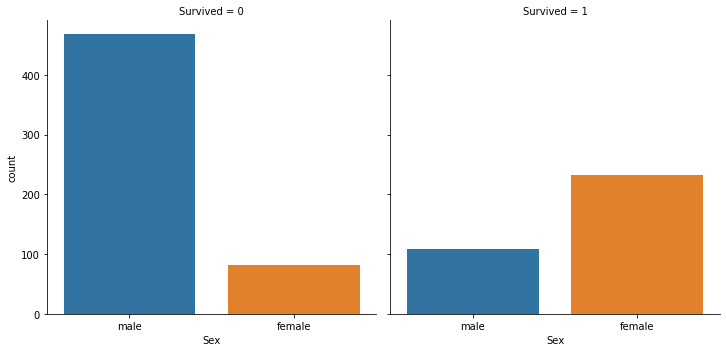

In [75]:
sns.catplot("Sex",col="Survived",data=data,kind="count")

In [76]:
#The female survival rate is 74.2% and the male survival rate is 18.9%. 

data.groupby(['Survived',"Sex"])["Survived"].count()  

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

### Most of the females and males who were travelling were from Passenger 3 class 

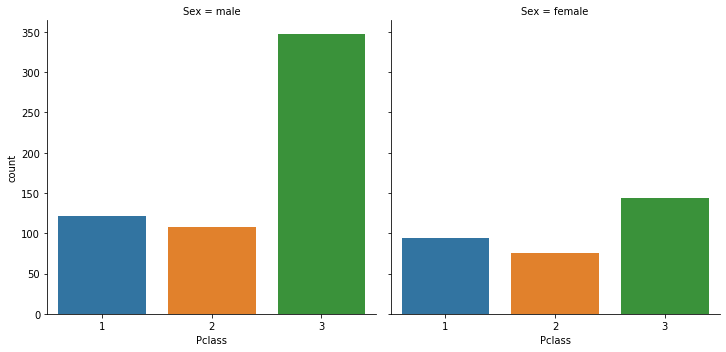

In [77]:
sns.catplot("Pclass",col="Sex",data=data, kind="count")

### Percentage of people who survived was just 38 %

In [78]:
count=data["Survived"].value_counts()
count

0    549
1    342
Name: Survived, dtype: int64

C:\Users\astha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


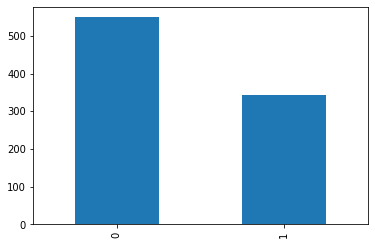

In [79]:
plt=data['Survived'].value_counts().plot("bar")

### The fare paid by females was more than the males for all the 3 Passenger class. The highest fare was paid by females of first passenger class.

In [80]:
data.groupby(["Pclass","Sex"])["Fare"].mean()

Pclass  Sex   
1       female    106.125798
        male       67.226127
2       female     21.970121
        male       19.741782
3       female     16.118810
        male       12.661633
Name: Fare, dtype: float64

Text(0.5, 1.0, 'Fare on the basis of Sex and Pclass')

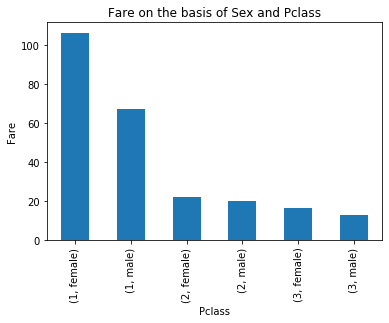

In [84]:
plt=data.groupby(["Pclass","Sex"])["Fare"].mean().plot(kind="bar")
plt.set_xlabel("Pclass")
plt.set_ylabel("Fare")
plt.set_title("Fare on the basis of Sex and Pclass")

### Passengers travelling in the Pclass 1 are more aged having mean age of 38 and Pclass 3 comprise of young passengers having mean age of approx 25

C:\Users\astha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


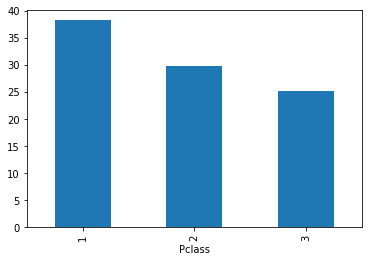

In [85]:
plt=data.groupby(["Pclass"])["Age"].mean().plot("bar")

### Passengers who survived more were from Pclass 1 who paid more fare.

In [86]:
data.groupby("Pclass")["Survived"].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

C:\Users\astha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Survival Status on the basis of Passenger class')

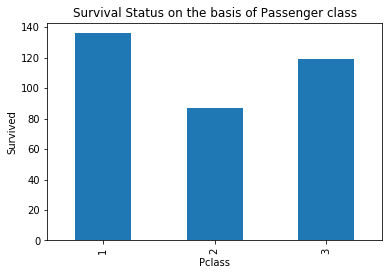

In [87]:
plt=data.groupby("Pclass")["Survived"].sum().plot("bar")
plt.set_xlabel("Pclass")
plt.set_ylabel("Survived")
plt.set_title("Survival Status on the basis of Passenger class")

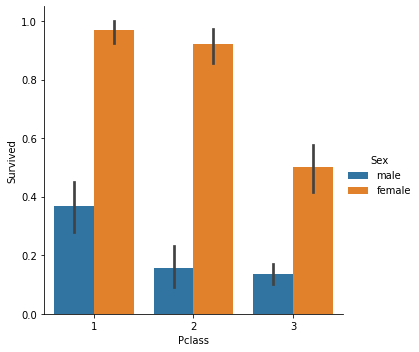

In [88]:
sns.catplot(x="Pclass", y="Survived",hue="Sex", data=data,kind="bar")

### Missing value in Age Column 

###### Age distribution seems to be almost same in Male and Female, so Sex is not informative to predict Age

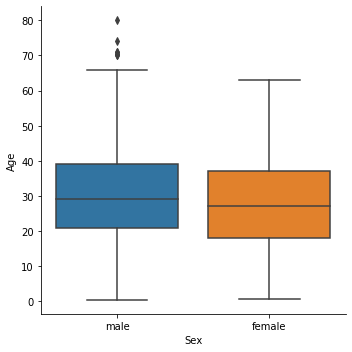

In [89]:
sns.catplot(y="Age", x="Sex", data = data, kind="box")

### We can see from the below plot that 38,29,25 are median values for the each Pclass, the median age can be used to fill the NaN values in Age Column

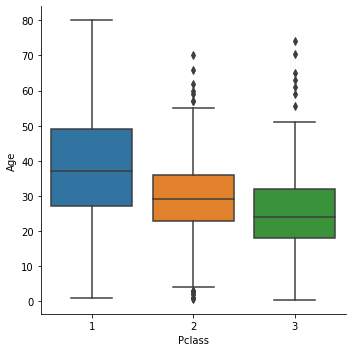

In [90]:
sns.catplot(data = data, x = 'Pclass' , y = 'Age', kind = 'box')

### We can see from the ditribution function that for Pclass 1 the distribution is symmetric,for Pclass 1 and 2 the distribution function is somewhat positively skewed. 

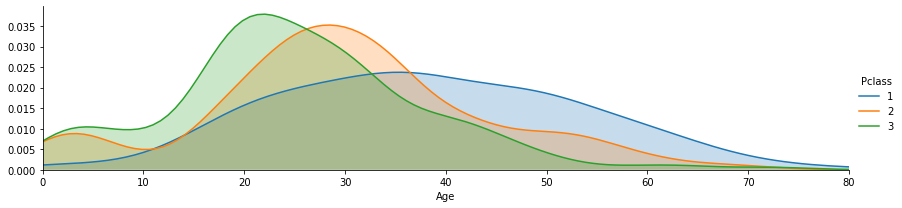

In [91]:
plt = sns.FacetGrid(data, hue="Pclass", aspect=4)
plt.map(sns.kdeplot,'Age',shade= True)
plt.set(xlim=(0, data['Age'].max()))
plt.add_legend()

C:\Users\astha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


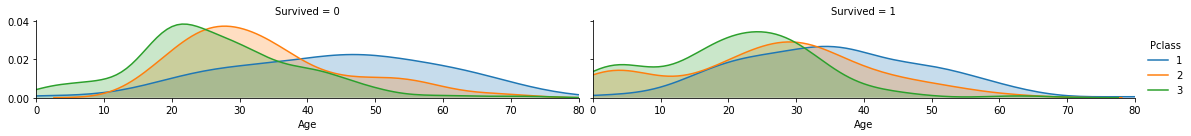

In [92]:
pt = sns.FacetGrid(data,col="Survived", hue="Pclass", aspect=4,size=2)
pt.map(sns.kdeplot,'Age',shade= True)
pt.set(xlim=(0, data['Age'].max()))
pt.add_legend()

In [93]:
data.groupby("Survived")["Age"].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

### Single passengers (0 SibSP) or with two other persons (SibSP 1 or 2) have more chance to survive.Passengers having more siblings have less chance to survive

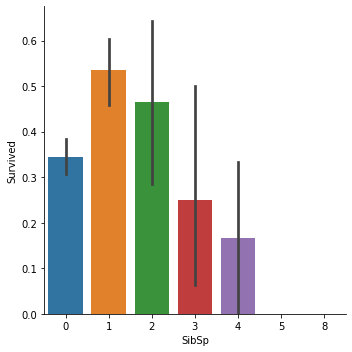

In [94]:
sns.catplot(x="SibSp",y="Survived",data=data,kind="bar")

### Now filling the values of the Age Column

In [95]:
data[data['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [96]:
def agefunc(data):
    for i in data[data['Age'].isnull()==True].index:
        if data['Pclass'][i]==3:
            data["Age"][i]=25
        elif data['Pclass'][i]==2:
            data["Age"][i]=29
        elif data['Pclass'][i]==1:
            data["Age"][i]=3  

In [97]:
agefunc(data)

C:\Users\astha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\astha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\astha\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [98]:
data = pd.get_dummies(data, columns=['Sex'])

In [99]:
data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


In [100]:
X = data.drop(columns = 'Survived')
y = data['Survived']

### Checking the accuracy without dong any Hyperparameter Tuning 

In [103]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 42)

In [104]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [105]:
clf.score(x_train,y_train)

0.9807383627608347

In [106]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.7649253731343284

### Hyperparameter Tuning 

In [107]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

x_transform = scalar.fit_transform(X)

In [136]:
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.30, random_state= 100)

In [146]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,30,1),
    'max_features':[5,6,7],
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [147]:
grid_search = GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs =-1)

In [148]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=6,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=7,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'm

In [149]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'}


In [150]:
grid_search.best_score_

0.8394967741935485

In [151]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth =5, max_features=6, min_samples_leaf= 1, min_samples_split= 7, splitter ='best')
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [152]:
clf.score(x_test,y_test)

0.8059701492537313